In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.executable
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix

In [2]:
features=pd.read_csv('bank_marketing_features.csv')
#Chèn thêm cột kết quả để tiến hành huấn luyện và phân tích
targets=pd.read_csv('bank_marketing_targets.csv')
df = pd.concat([features, targets], axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


## Tiền xử lí dữ liệu

### Kiểm tra dữ liệu

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dịch nghĩa các cột:
- age: Độ tuổi.
- job: công việc.
- marital : Tình trạng hôn nhân.
- education: trình độ học vấn.
- default: Tình trạng nợ xấu.
- balance: Số dư trung bình hằng năm.
- housing: Khoản vay mua nhà.
- loan: Tình trạng vay cá nhân.
- contact: Phương thức liên hệ.
- day_of_week: Thời gian liên hệ cuối.
- month: Tháng liên hệ cuối trong năm.
- duration: Thời glượng cuộc gọi.
- campaign: Số lần liên hệ giới thiệu dịch vụ.
- pdays: Số ngày đã trôi qua sau khi khách hàng được liên hệ lần cuối từ một chiến dịch trước.
- previous: Số lần liên hệ trong chiến dịch lần trước.
- poutcome: Kết quả của chiến lược phân loại trước đó.

Các cột dữ liệu dạng numeric: age, balance, day_of_week, duration, campaign, pdays, previous.

Các cột dữ liệu dạng categorical: job, marital, education, default, housing, loan, contact, month, poutcome

In [6]:
#Chèn thêm cột kết quả để tiến hành huấn luyện và phân tích
targets=pd.read_csv('bank_marketing_targets.csv')
df = pd.concat([features, targets], axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


## Xử lí dữ liệu khuyết lỗi và null 

Kiểm tra dữ liệu null

In [7]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

Những giá trị nan của poutcome có thể là những khách hàng không nằm trong chiến dịch phân loại lần trước nên vì thế ta gáng cho những nan này là not_plan

In [8]:
df['poutcome']=df['poutcome'].fillna('not_plan')

Nhận thấy thông tin liên lạc không ảnh hưởng nhiều đến kết quả ta xóa cột contact

In [9]:
df = df.drop(columns=['contact'])

Thay thế các giá trị bị khuyết trong cột education bằng Unknown

In [10]:
df['education']=df['education'].fillna('unknown')

Thông tin liên quan tới công việc bị khuyết khá ít nên ta sẽ drop những dòng đó


In [11]:
df=df.dropna()

Kiểm tra lại

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          44923 non-null  int64 
 1   job          44923 non-null  object
 2   marital      44923 non-null  object
 3   education    44923 non-null  object
 4   default      44923 non-null  object
 5   balance      44923 non-null  int64 
 6   housing      44923 non-null  object
 7   loan         44923 non-null  object
 8   day_of_week  44923 non-null  int64 
 9   month        44923 non-null  object
 10  duration     44923 non-null  int64 
 11  campaign     44923 non-null  int64 
 12  pdays        44923 non-null  int64 
 13  previous     44923 non-null  int64 
 14  poutcome     44923 non-null  object
 15  y            44923 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.8+ MB


Kiểm tra các giá trị trùng lập

In [13]:
cs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
for c in cs:
    print(f"{c}: {df[c].unique()}")

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['not_plan' 'failure' 'other' 'success']


#### Kiểm tra giá trị trùng lập

## Phân tích

### Phân tích đơn biến

In [14]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000,44923.000000
mean,40.893529,1359.643011,15.813882,258.294838,2.760345,40.321016,0.581996
std,10.604399,3045.091520,8.320040,257.713770,3.092838,100.255146,2.309077
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1421.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Về độ tuổi trung bình của các đối tượng khoản nằm ở mức 40 tuổi các dao động từ đối tượng trẻ nhất là 18 tuổi cho đến lớn tuổi nhất là 95. Dựa vào phân vị ta thấy được đa phần các đối tượng khách hàng được nhắm đến trên 30 tuổi.
- Số dư trung bình của các khách hàng là 1359$ trong số đó có những khách hàng có số dư âm(Đang nợ ngân hàng). Có những khách hàng có số dư lên đến 102127.
- day of week là ngày liên hệ cuối trong tháng .
- duration(thời lượng cuộc gọi trong lần liên hệ tư vấn ở chiến dịch lần trước) Thời lượng dao động từ thấp nhất là 0 có thể thấy đây là những khách hàng không phản hồi hoặc không nằm trong chiến lược tiếp thị lần trước. Và trung bình là 258 có cuộc gọi dài nhất đạt 4918.
- campaign(Số lần tiếp thị): Gần 3 lượt tiếp thị trung bình đến với mỗi khách hàng trong danh sách. Khách hàng được tiếp cận ít nhất là 1 lần và nhiều nhất là 63 lần.
- pdays: các khách hàng có pdays là -1 là khách hàng chưa được liên hệ trước đó đa phần khách hàng thuộc vào dạng chưa được liên hệ có thể thấy thông qua phân vị. Và khác hàng có pdays cao nhất là 871.
- Previous: đa phần điều chưa được liên hệ trong lượt tiếp thị trước và có trường hợp có tới 275 lượt.

#### Phân tích đơn biến dạng cat

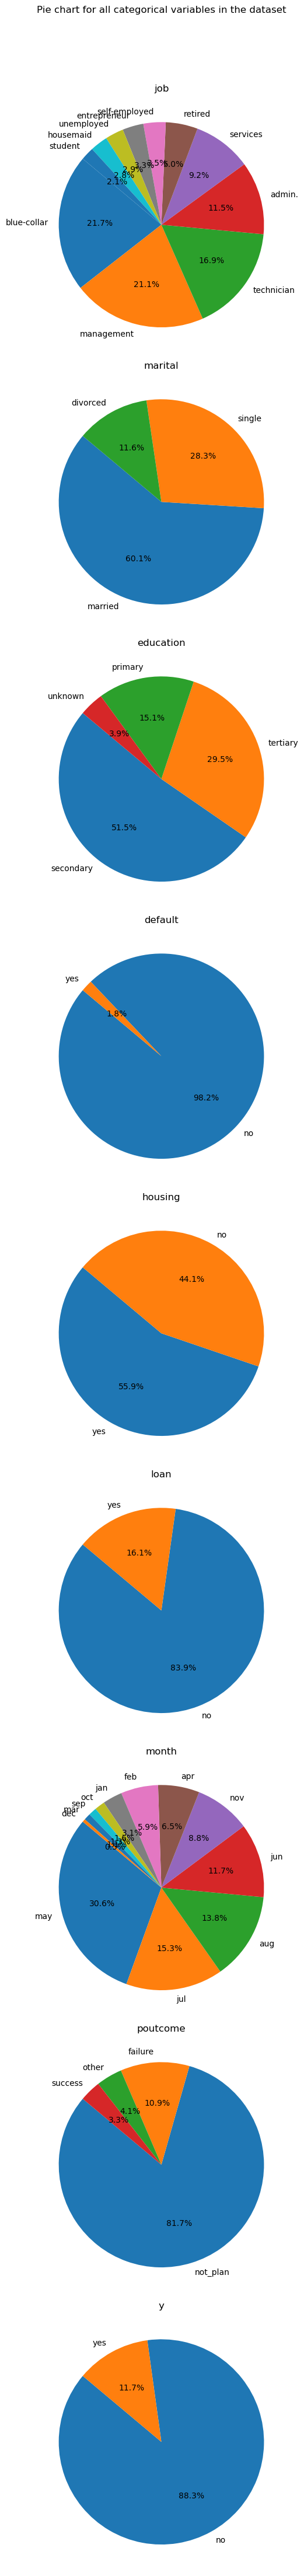

In [15]:
import matplotlib.pyplot as plt

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'y']
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, len(cat_cols)*5))
fig.suptitle('Pie chart for all categorical variables in the dataset')

for count, col in enumerate(cat_cols):
    category_counts = df[col].value_counts(normalize=True)
    axes[count].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axes[count].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Nhìn vào các biểu đồ tròn ta có các nhận định:
- Đối với job gồm 11 giá trị khác nhau cho các đối tượng khạch hàng chiếm đa số là blue-collar với 21.7% và management với 21.1%  theo sau là technician chiếm 16.9%, 11.5% là admin và services 9.2%. Các ngành nghề còn lại chiếm dưới 5% lần lượt là retired, self-emplouyed, entrepreneur,unemplouyed, housemaid và thấp nhất là student với 2.1%.
- Các khách hàng phần đông là người có gia đình và chiếm tới 60.1%, các khách hàng còn độc thân chiếm 28.3% và ít nhất là các khách hàng đã li hôn.
- Về trình độ học vấn chiếm đa số là trình độ sơ trung 51.5%, giáo dục sau THPT chiếm khá đông 29.5%, phần nhỏ các đối tượng có trình độ tiểu học chiếm 15.1% và 3.9% các đối tượng không được xác định.
- Đa số các khách hàng điều không bị nợ xấu và phần nhỏ nợ xấu trong danh sách ở đây chỉ chỉ chiếm 1.8%.
- Về khoản vay mua nhà có tới 55.9% khách hàng trong tập dữ liệu  có khoản vay.
- Về khoản vay cá nhân đa phần cách khách hàng điều không vay nhưng số lượng khác hàng có khoản vay cũng không nhỏ khi chiếm 16.1%.
- Đa số các khách hàng này được liên hệ nhiều nhất từ tháng 5 cho đến tháng 8 và đặt biệt nhiều nhất ở tháng 5.
- Trong danh sách huấn luyện lần này có 11.7% các khách hàng chọn gửi tiết kiệm và 88.3% còn lại chọn không.

#### Phân tích đơn biến dạng num

age
Skew : 0.69


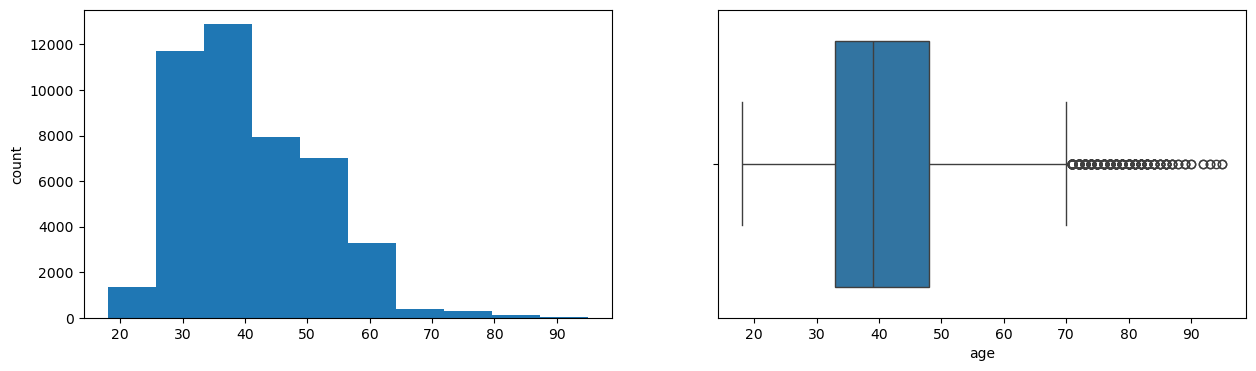

balance
Skew : 8.39


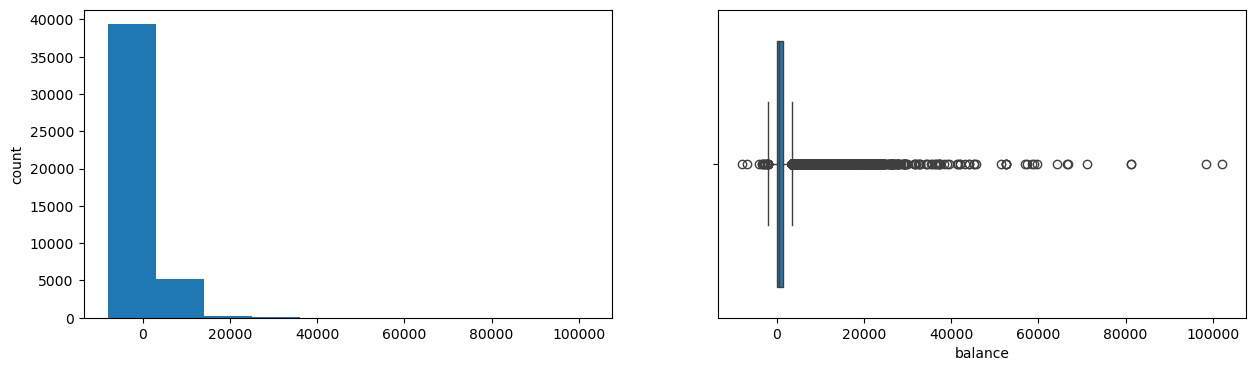

day_of_week
Skew : 0.09


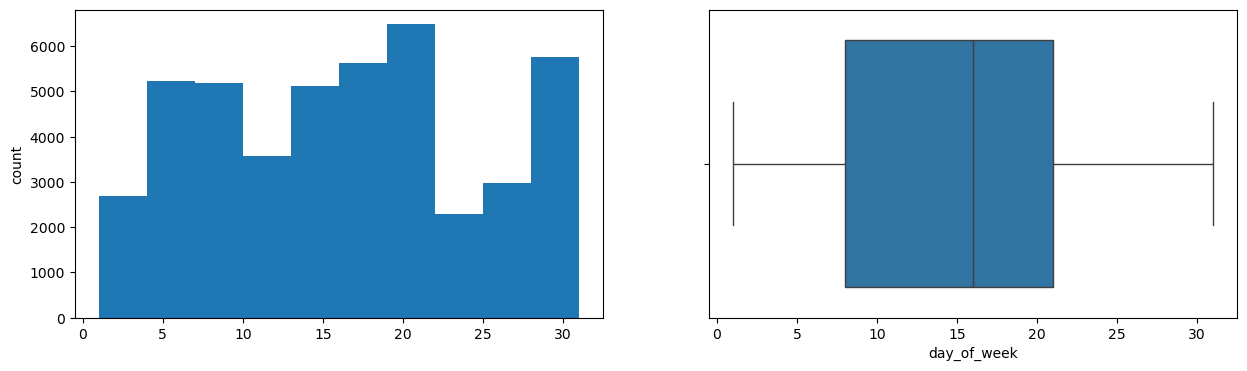

duration
Skew : 3.15


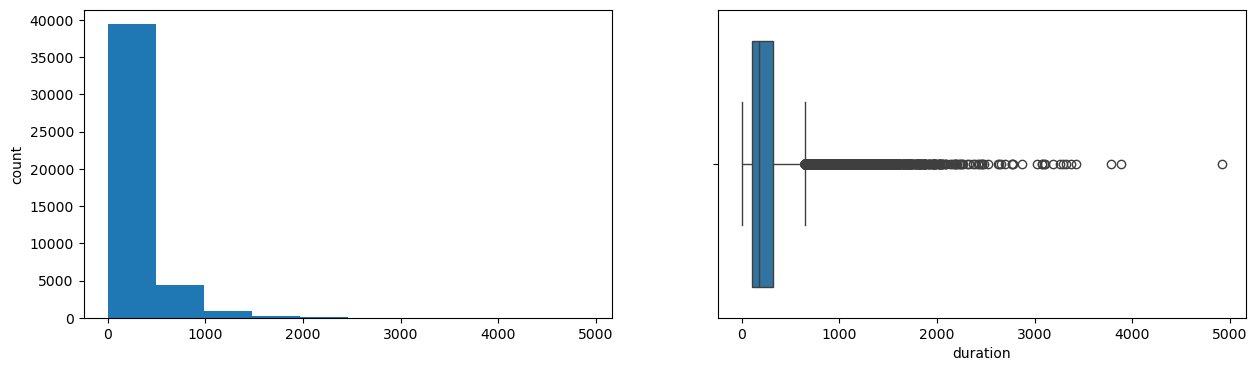

campaign
Skew : 4.91


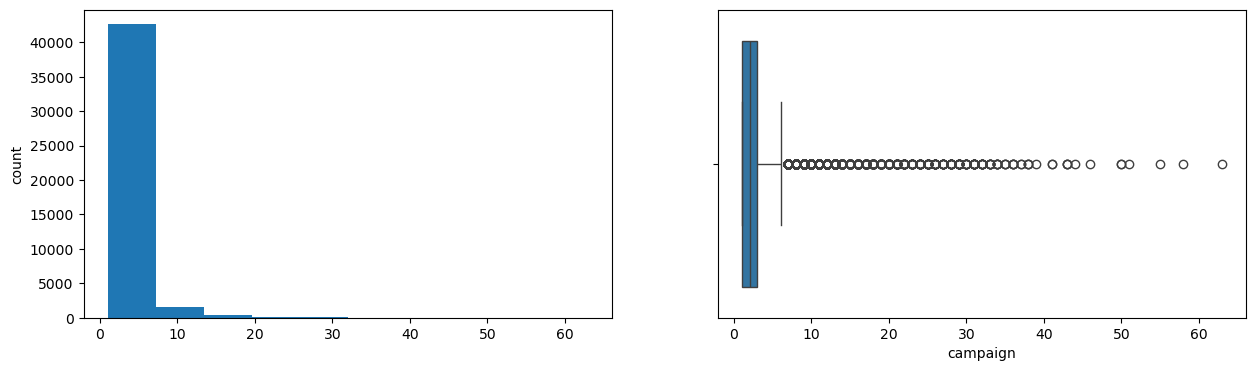

pdays
Skew : 2.61


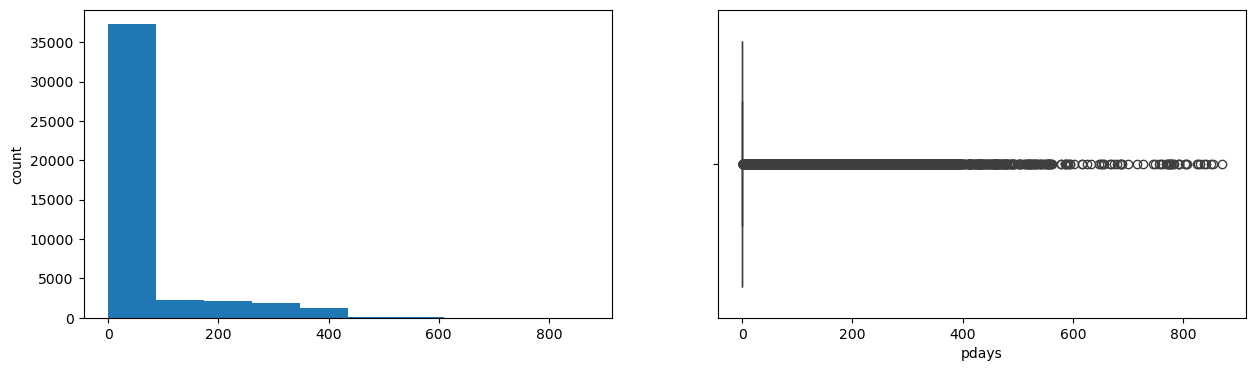

previous
Skew : 41.8


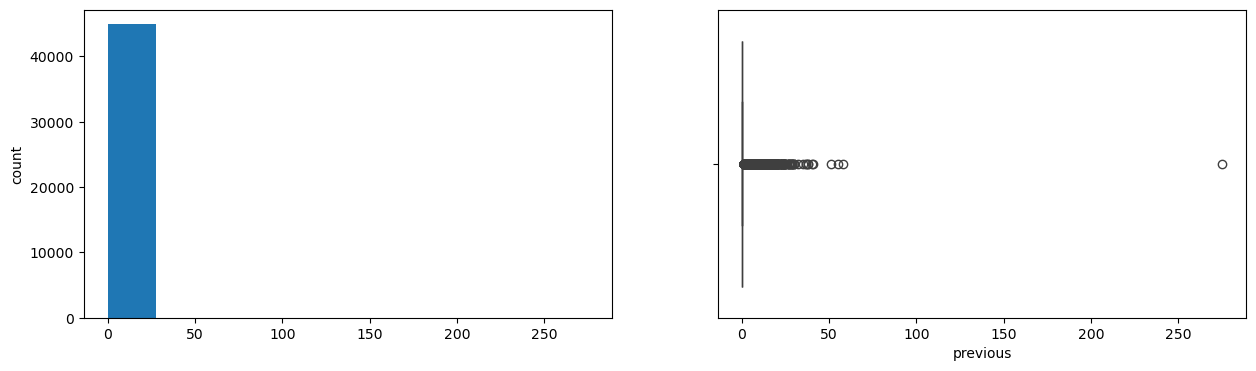

In [16]:
num_cols=['age','balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Dùng tứ phân vị loại bỏ ngoại biên

In [17]:
num_cols=['age','balance', 'duration','campaign']
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_outliers = df[~outlier]

age
Skew : 0.43


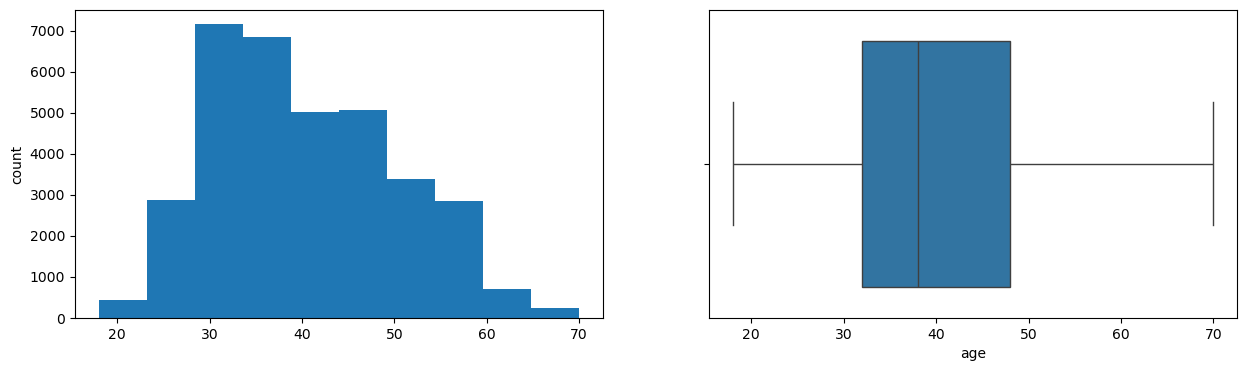

balance
Skew : 1.3


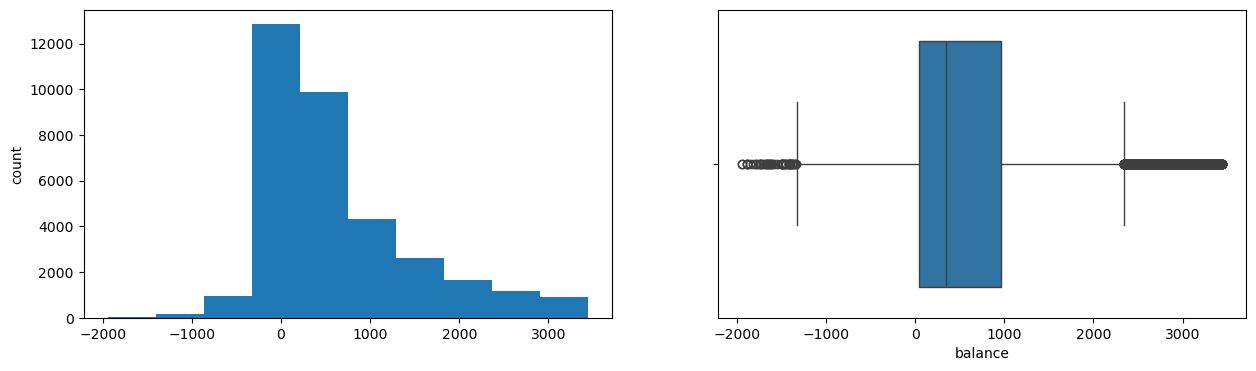

duration
Skew : 1.02


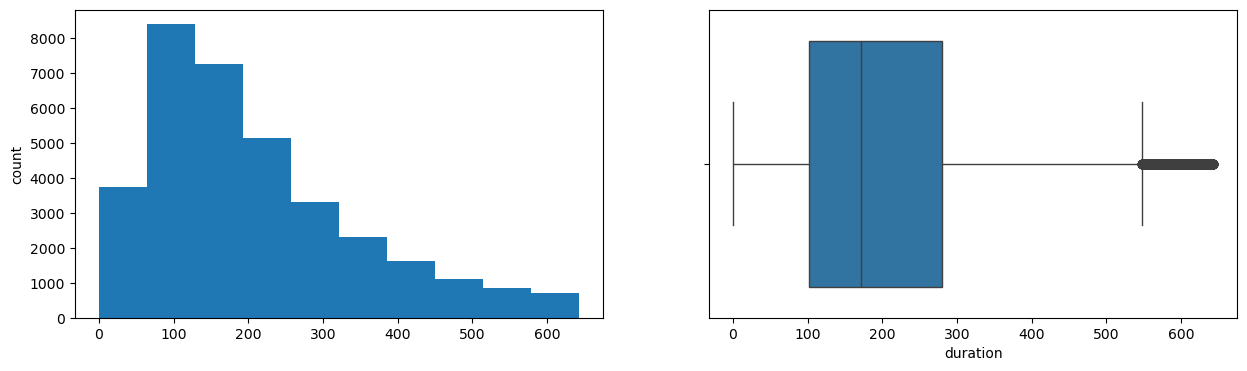

campaign
Skew : 1.22


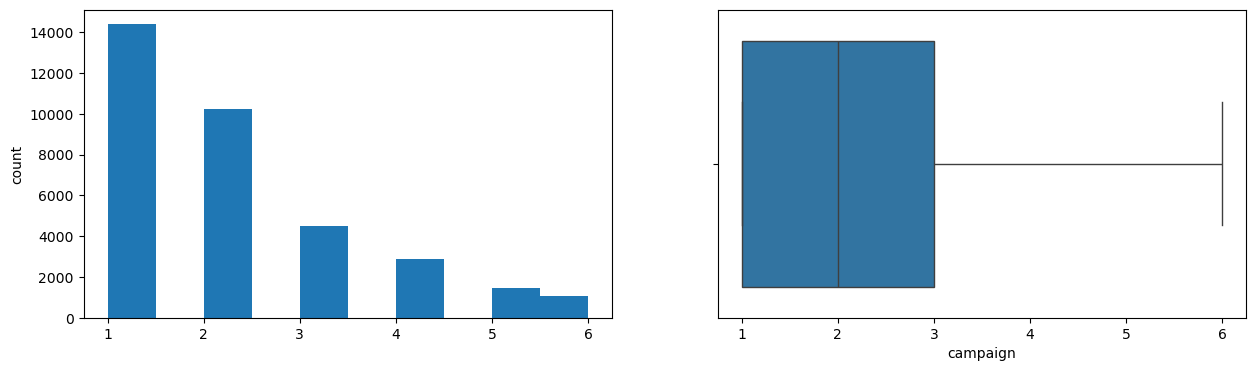

In [18]:
num_cols=['age','balance', 'duration','campaign']
for col in num_cols:
    print(col)
    print('Skew :', round(df_no_outliers[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_no_outliers[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_no_outliers[col])
    plt.show()

Nhìn tổng quan vào các biểu đồ ta có thể thấy đa phần chúng điều lệch phải dựa vào histogram và boxplot ta có được các nhận định sau
- Đối với dữ liệu tuổi ta thấy nó phân bố chủ yếu từ 20 cho đến 60 tuổi và nhóm tuổi tập trung đông nhất là từ 30 đến 40 đây là độ tuổi đã có công việc ổn định và đã có khoản dư tích lũy. 
- Số dư trung bình tính theo năm của đa số các khách hàng khá thấp trong khi có những trường hợp sô dư lại rất cao.
- Nhìn vào day_of_week ta thấy các ngày liên hệ đến khách hàng không đồng điều.
- Các cuộc gọi đến với khách hàng dầu hết là ngắn và không kéo dài lâu song với điều đó có các cuộc gọi kéo dài rất lâu.
- Hầu hết các lần liên hệ giới thiệu dịch vụ là ít với số lượng nhất định nhưng cũng có nhiều trường hợp số lần liên hệ đặt biệt có ngoại lệ lên đén hơn 60 lần.
- pdays và previous cho thấy hầu hết khách hàng không được liên hệ lại sau chiến dịch trước hoặc chỉ được liên hệ rất ít lần.

Sau quá trình xem xét các biểu đồ em quyết định dùng tứ phân vị loại bỏ giá trị ngoại biên của các giá trị sau (age, balance, duration,campaign) đối với day_of_week nằm trong khổ 31 ngày và không có ngoại lệ, trường hợp của pdays và previous nếu loại ngoại biên chỉ còn 1 giá trị sẽ ảnh hưởng đến mô hình.


### Phân tích song biến

<Figure size 1300x1700 with 0 Axes>

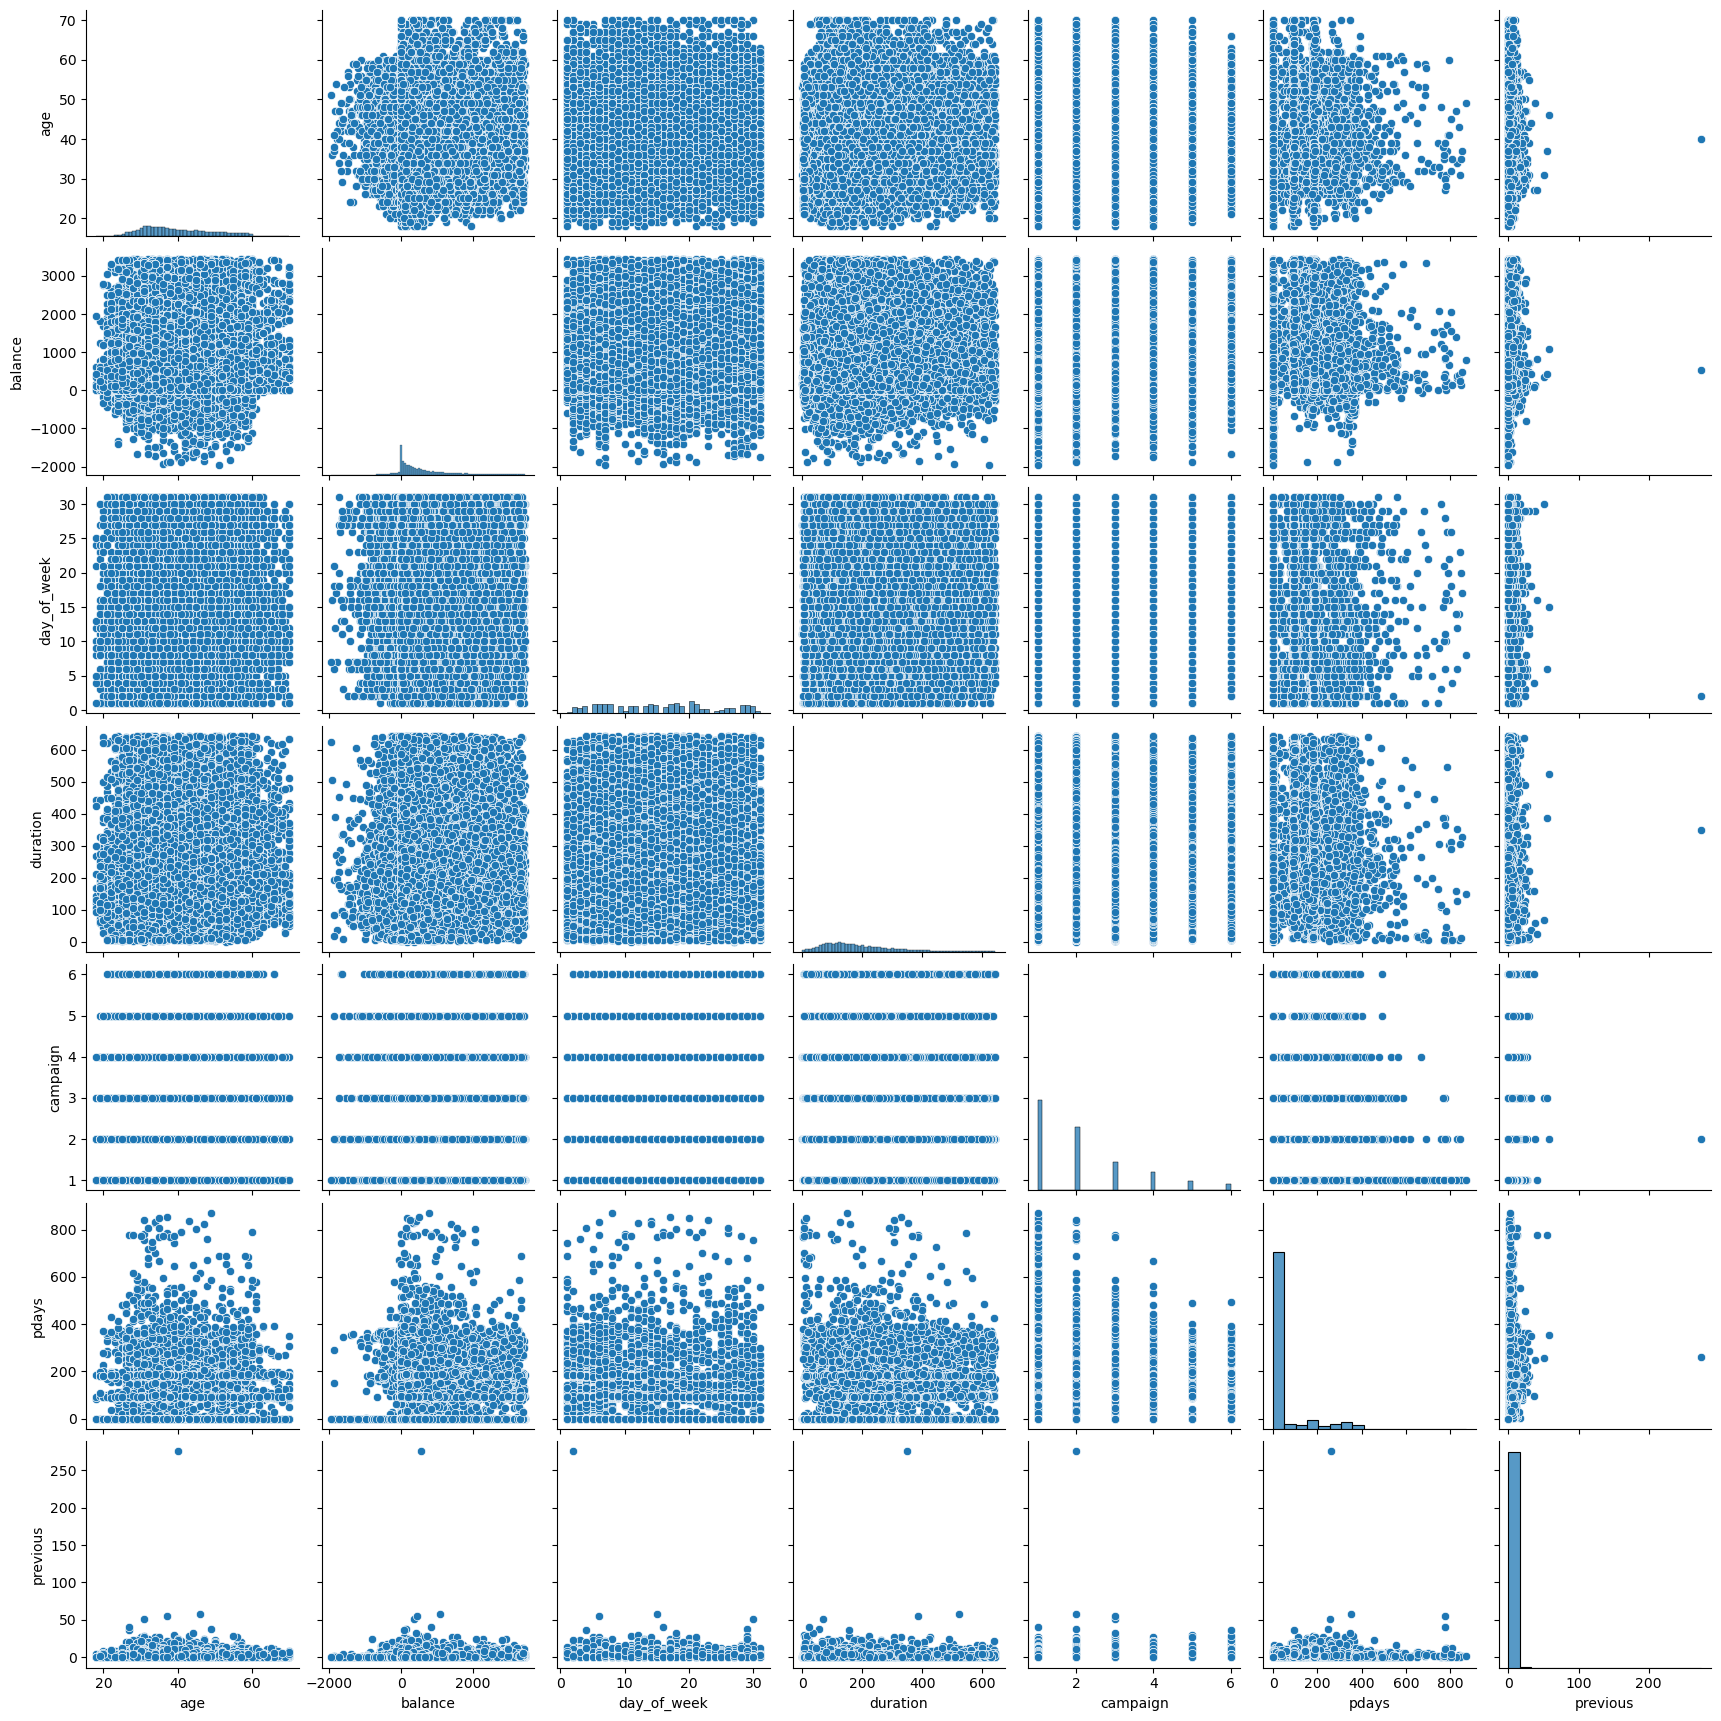

In [19]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df_no_outliers)
plt.show()

Nhìn vào biểu đồ trên có thể thấy không có mối quan hệ tuyến tính, phi tuyến tính hay mối quan hệ phụ thuộc nào được thể hiện rõ ràng trên biểu đồ.

job
blue-collar      7699
management       7001
technician       5884
admin.           4186
services         3332
retired          1395
self-employed    1180
entrepreneur     1146
unemployed        984
housemaid         933
student           762
Name: count, dtype: int64 



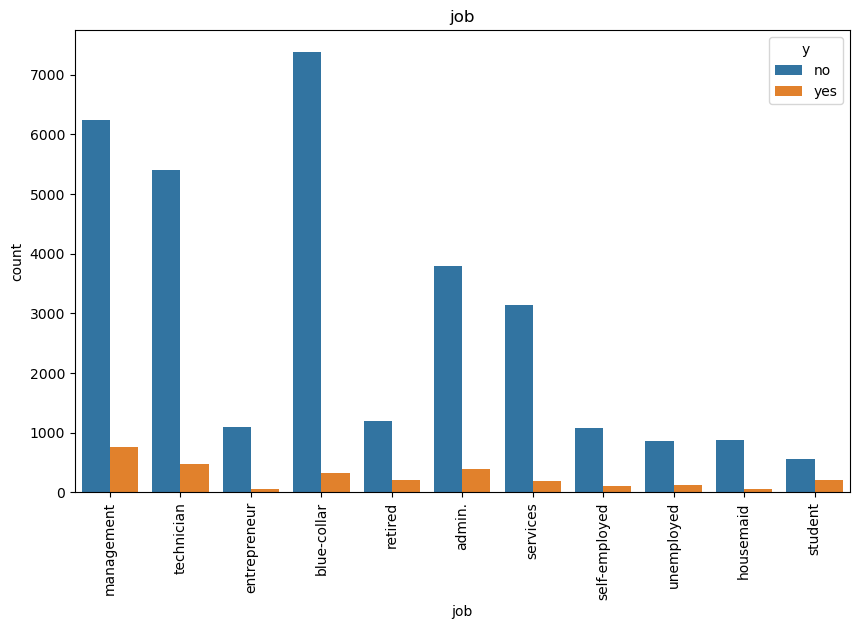

marital
married     20533
single       9937
divorced     4032
Name: count, dtype: int64 



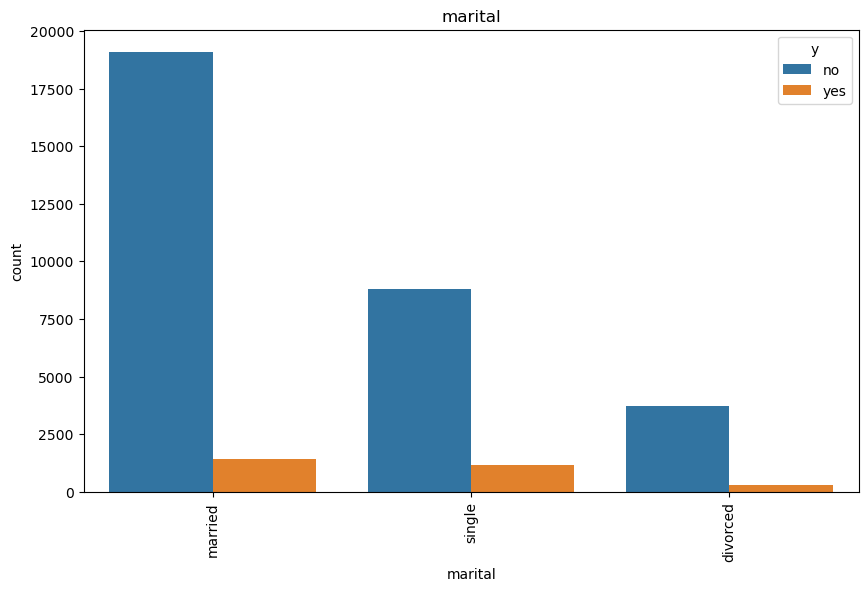

education
secondary    18315
tertiary      9804
primary       5116
unknown       1267
Name: count, dtype: int64 



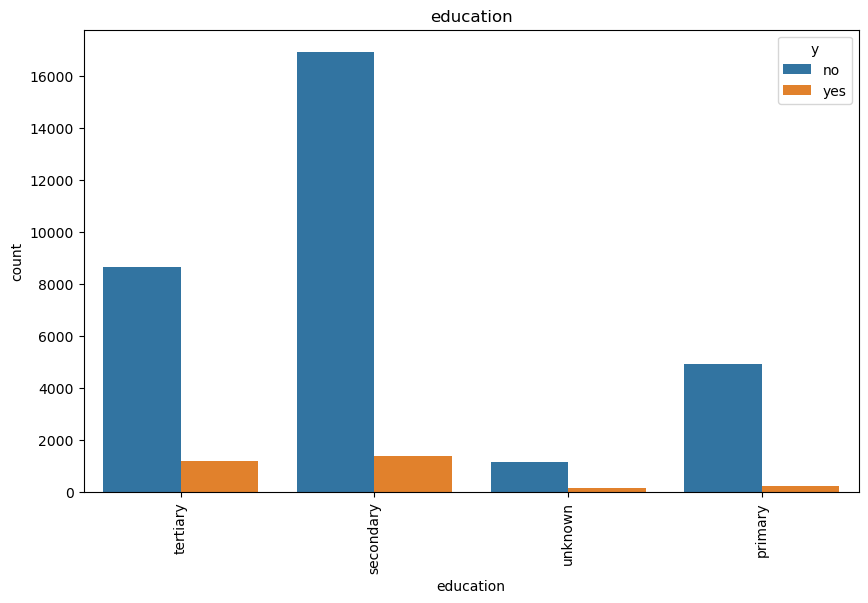

default
no     33828
yes      674
Name: count, dtype: int64 



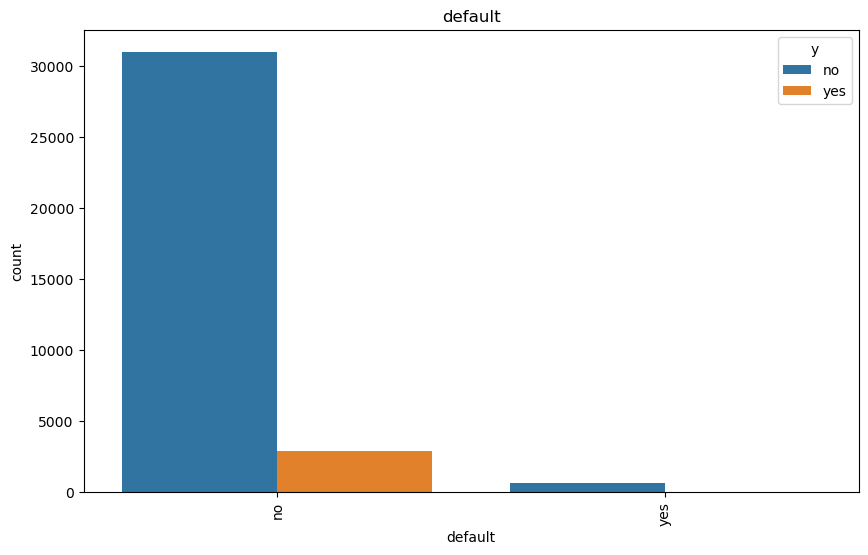

housing
yes    19812
no     14690
Name: count, dtype: int64 



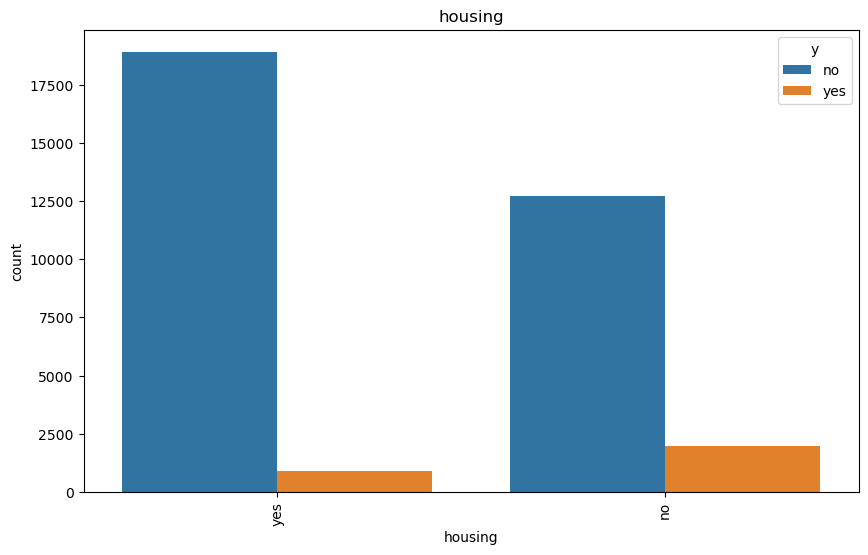

loan
no     28580
yes     5922
Name: count, dtype: int64 



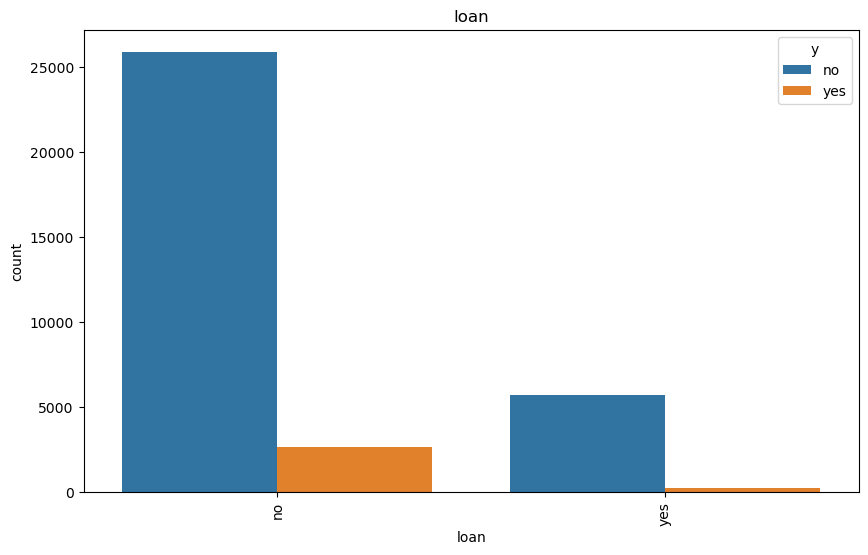

day_of_week
20    1912
18    1730
6     1559
8     1557
5     1536
17    1528
7     1496
14    1460
21    1435
29    1364
28    1301
15    1271
12    1260
9     1250
19    1242
13    1242
30    1175
4     1142
11    1133
16    1059
2     1033
27     837
3      819
26     787
23     721
22     686
25     589
10     421
31     359
24     348
1      250
Name: count, dtype: int64 



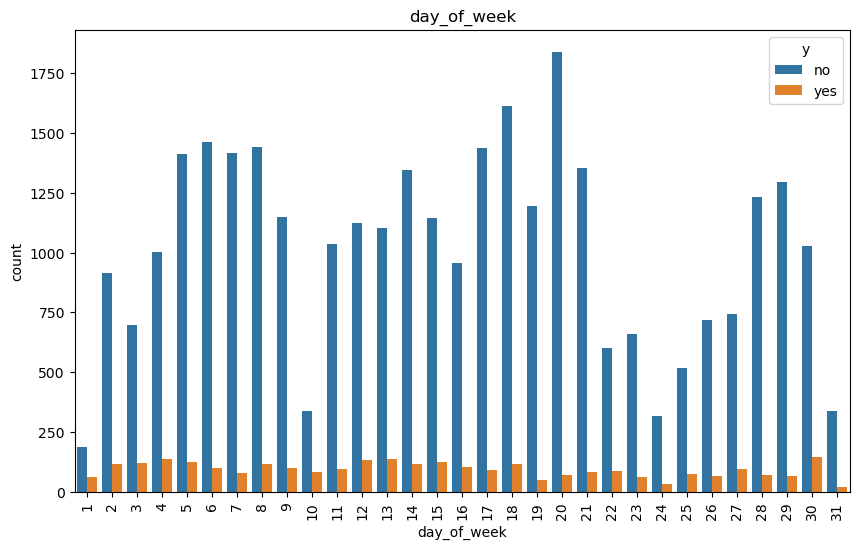

month
may    11251
jul     5214
aug     4430
jun     3870
nov     2764
apr     2277
feb     2090
jan     1211
oct      507
sep      406
mar      337
dec      145
Name: count, dtype: int64 



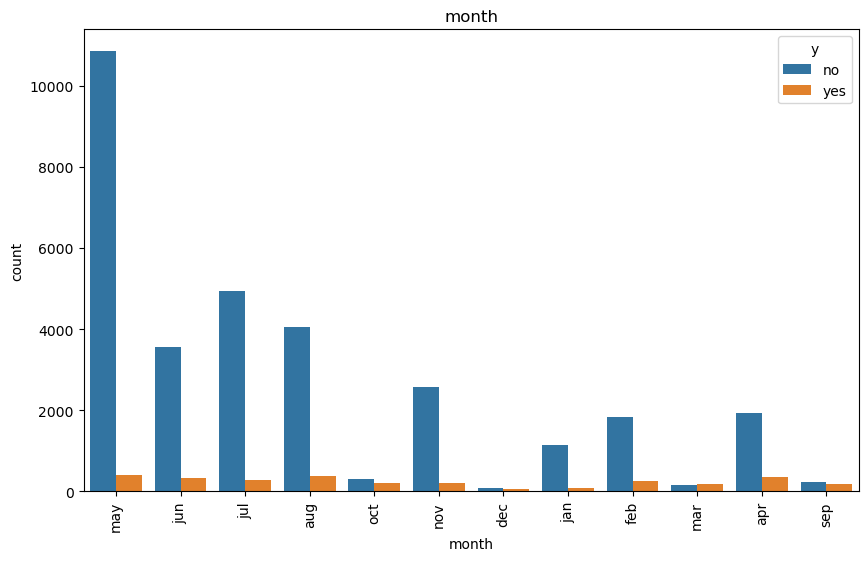

poutcome
not_plan    28010
failure      3957
other        1426
success      1109
Name: count, dtype: int64 



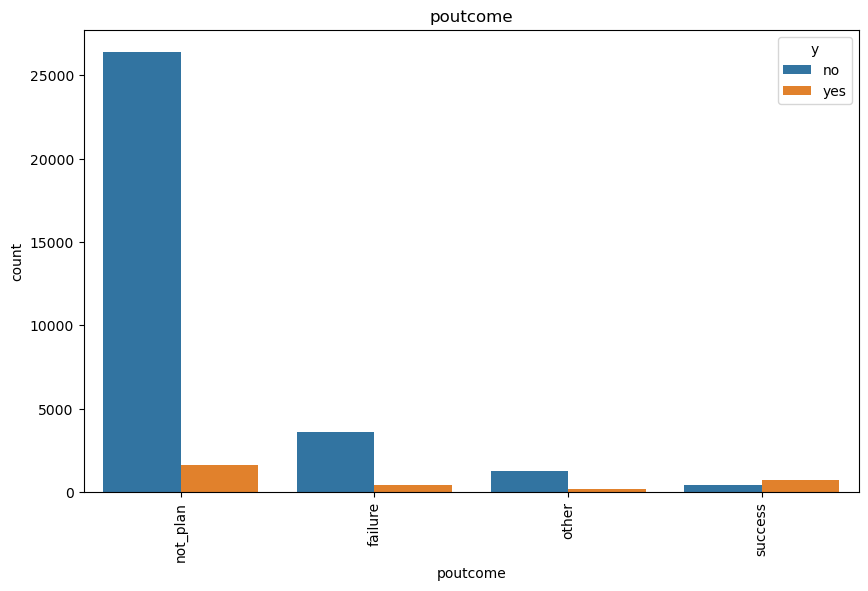

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64 



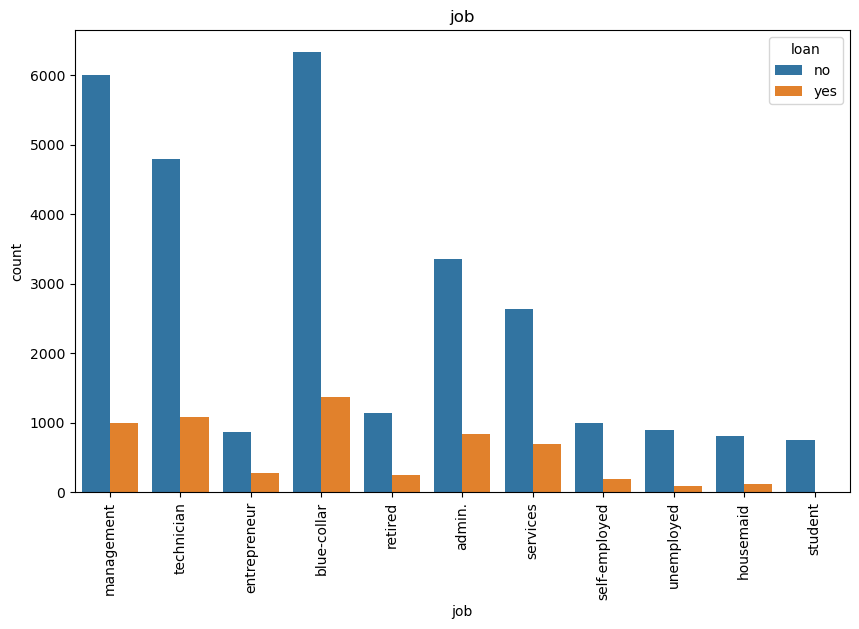

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64 



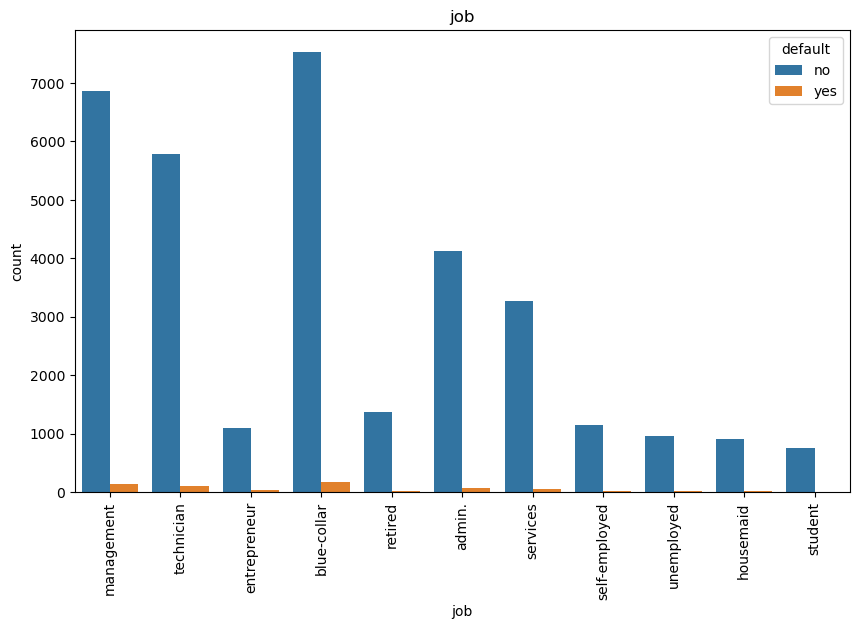

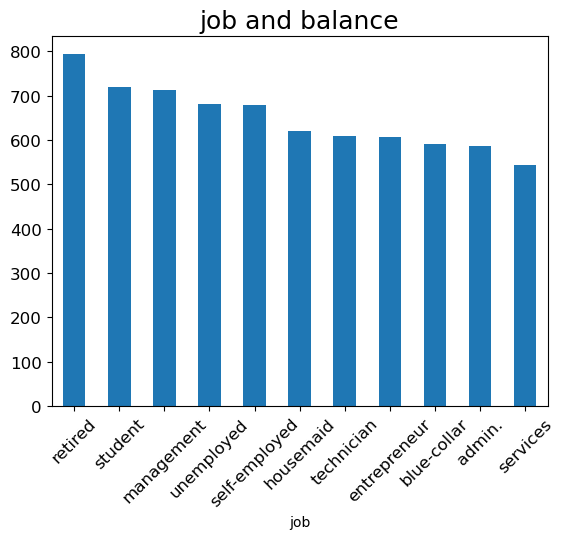

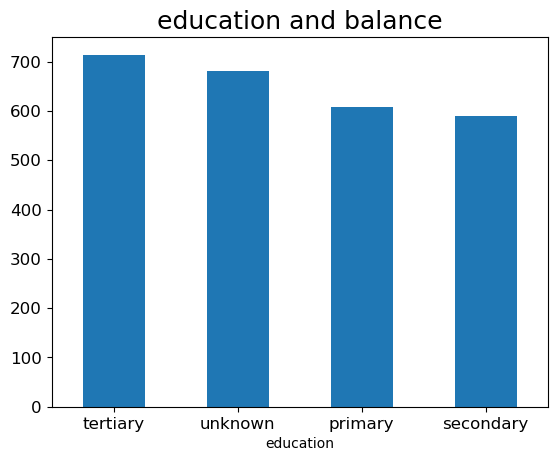

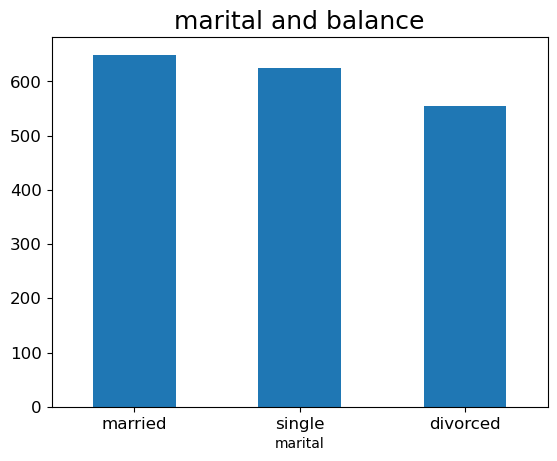

In [20]:
cat_cols= ['job', 'marital', 'education', 'default', 'housing', 'loan','day_of_week', 'month','poutcome']
for c in cat_cols:
    print(df_no_outliers[c].value_counts() , '\n')
    plt.figure(figsize=(10, 6))  
    sns.countplot(x=c, data=df_no_outliers , hue = 'y')
    plt.xticks(rotation=90)  
    plt.title(c)  
    plt.show()
    
print(df['job'].value_counts() , '\n')
plt.figure(figsize=(10, 6))  
sns.countplot(x='job', data=df_no_outliers , hue = 'loan')
plt.xticks(rotation=90)  
plt.title('job')  
plt.show()

print(df['job'].value_counts() , '\n')
plt.figure(figsize=(10, 6))  
sns.countplot(x='job', data=df_no_outliers , hue = 'default')
plt.xticks(rotation=90)  
plt.title('job')  
plt.show()

df_no_outliers.groupby('job')['balance'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.title("job and balance", fontsize=18)
plt.xticks(rotation=45)  
plt.show()

df_no_outliers.groupby('education')['balance'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.title("education and balance", fontsize=18)
plt.xticks(rotation=0)
plt.show()

df_no_outliers.groupby('marital')['balance'].mean().sort_values(ascending=False).plot.bar(fontsize=12)
plt.title("marital and balance", fontsize=18)
plt.xticks(rotation=0)  
plt.show()




Dựa vào các countplot cho thấy các giá trị ảnh hưởng đến quyết định gửi tiết kiệm của khách hàng:
- Về công việc ảnh hưởng đến quyết định thì có thể thấy các ngành nghề như quản lí, kỹ thuật, công nhân được liên lạc nhiều nhất nhưng số lượng gửi tiết kiệm ở các ngành nghề này rất ít trong khi học sinh và diện nghỉ lại có tỉ lệ đồng ý cao hơn so với các ngành nghề khác.
- Những khách hàng đã kết hôn là đối tượng được liên hệ nhiều nhất tuy nhiên những khách hàng độc thân thường có nhu cầu gửi tiết kiệm nhiều hơn những khách hàng có gia đình hay đã li hôn.
- Những khách hàng có học vấn trung học được liên lạc nhiều nhất, nhưng những khách hàng có học vấn đại học lại có tỉ lệ gửi tiết kiệm cao hơn. Điều này có thể cho thấy những cá nhân có trình độ học vấn cao hơn có khả năng gửi tiết kiệm.
- Tỉ lệ khách hàng có nợ xấu là rất ít và các khách hàng này không có nhu cầu gửi tiết kiệm. 
- Về khoản vay mua nhà có thể thấy được các khách hàng không có khoản vay này sẽ có nhu cầu gửi tiết kiệm cao hơn.
- Các khách hàng không có khoản vay cá nhân thường sẽ có nhu cầu gửi tiết kiệm cao hơn các khách hàng có khoản vay.
- Nhìn vào tháng liên hệ cuối trong năm không tác động nhiều đến quyết định gửi tiết kiệm của khách hàng và không nhận thấy sự ảnh hưởng theo mùa nhưng có thể thấy được các khoản giữa năm các khách hàng sẽ được liên lạc tư vấn nhiều hơn các mốc thời gian khác.
- Có thể thấy trong tập dữ liệu này đa phần các khách hàng điều là chưa tiếp xúc với chiến dịch tiếp thị này. Trong đó các khách hàng đã gửi tiết kiệm trong chiến dịch lần trước bây giờ vẫn tiếp tục đồng ý gửi tiết kiệm, một số ít khách hàng chọn phương án không gửi tiết kiệm qua chiến dịch lần này cũng thay đổi quyết định của mình qua đó có thể thấy được các chiến dịch trước đây mang lại ảnh hưởng rất tốt cho chiến dịch hiện tại.
- Các đối tượng khách hàng thuộc các ngành nghề như công nhân ,quản lí, kỹ thuật, admin là những ngành nghề có xu thế vay cá nhân/ Tỉ lệ cao nhất là của services. Những đối tượng thất nghiệp, người hầu , hay những người tự kinh doanh thường ít có khoản vay hơn. Đặt biệt là học sinh, sinh viên thường không có khoản vay.
- Những người thuộc diện nghỉ hưu sẽ có số dư hằng năm ở top đầu so với các ngành khác và giảm theo thứ tự là học sinh sinh viên, quản lí, thất nghiệp, tự kinh doanh, giúp việc,.. các ngành còn lại không chênh lệch nhiều.
- Trình độ học vấn cũng phản ánh số dư hằng năm đứng đầu là trình độ đại học cao hơn so với các đối tượng còn lại.
- Các đối tượng đã kết hôn sẽ có khoản dư hằng năm tốt nhất, những khách hàng độc thân cũng không kém cạnh trong khi số dư trung bình hằng năm của khách hàng đã hi hôn lại thấp hơn khoản  50

### Phân tích đa biến

Dùng Label Encoding chuyển các giá trị về dạng số để tiến hành phân tích

In [21]:
from sklearn.preprocessing import LabelEncoder
df_no_outliers['y'] = df_no_outliers['y'].map({'yes': 1, 'no': 0})

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']

for col in cat_cols:
    label_encoder = LabelEncoder()
    df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])

In [22]:
df_no_outliers.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,1,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,1,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,1,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,1,0
5,35,4,1,2,0,231,1,0,5,8,139,1,-1,0,1,0


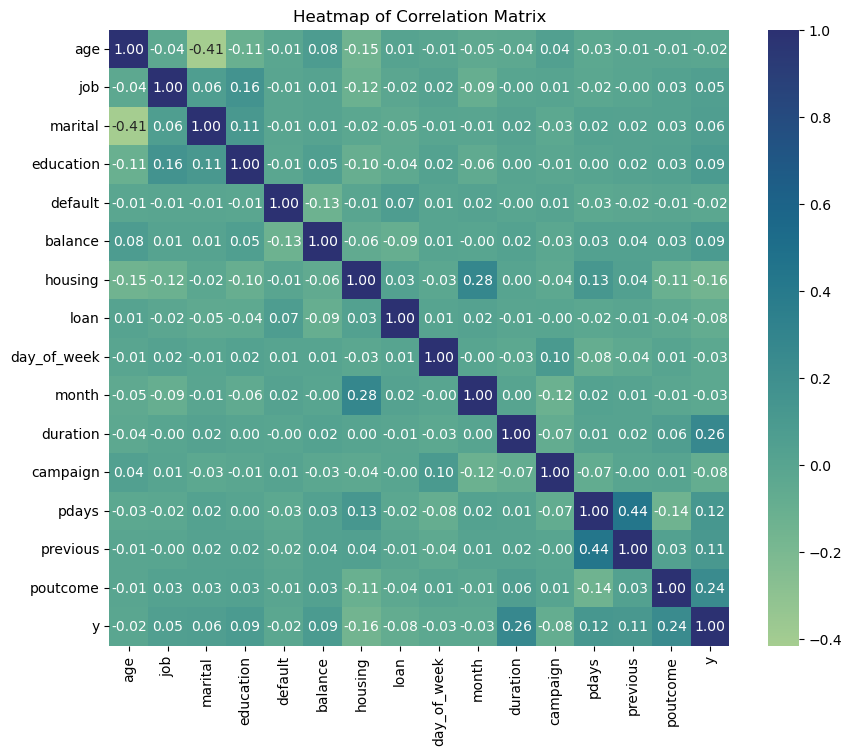

In [23]:

corr_matrix = df_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='crest', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


Dựa vào heatmap ta có các nhận xét sau:
- Độ tuổi ảnh hưởng lớn đến tình trạng hôn nhân
- Thời gian liên hệ trong chiến dịch lần trước ảnh hưởng đến số lần liên hệ.
- trình độ học vấn cũng như độ tuổi ảnh hưởng đến việc khách hàng có khoản vay mua nhà hay không cũng như là thành phần quang trọng nhất ảnh hưởng đến số dư của khách hàng.
- Trình độ học vấn, số dư tài chỉnh, khoản nợ, thời lượng liên hệ cũng như các yếu tố từ chiến dịch liên hệ từ lần trước ảnh hưởng nhiều kết quyết định của khách hàng về việc gửi tiết kiệm


## Xây dựng mô hình

Sau quá trình phân tích trên nhận thấy thời gian liên hệ hầu như không ảnh hưởng đến quyết định gửi tiết kiệm của khách hàng nên ta sẽ loại bỏ chúng khỏi quá trình huấn luyện.

In [24]:
x = df_no_outliers.drop(['y','day_of_week','month'],axis=1)
y = df_no_outliers['y']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 101)

In [25]:
x.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,261,1,-1,0,1
1,44,9,2,1,0,29,1,0,151,1,-1,0,1
2,33,2,1,1,0,2,1,1,76,1,-1,0,1
3,47,1,1,3,0,1506,1,0,92,1,-1,0,1
5,35,4,1,2,0,231,1,0,139,1,-1,0,1


In [26]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: y, dtype: int64

In [27]:
print('X_train shape',x_train.shape)
print('X_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (27601, 13)
X_test shape (6901, 13)
y_train shape (27601,)
y_test shape (6901,)


In [28]:
model = Sequential()
model.add(Dense(128 , activation='relu' , input_dim = x.shape[1]))
model.add(Dense(64 , activation='relu' ))
model.add(Dense(32 , activation='relu' ))
model.add(Dense(1 , activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss = 'binary_crossentropy' ,  optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train , y_train , epochs=30 , batch_size=64 , validation_data=(x_test, y_test))

Epoch 1/30
432/432 [==============================] - 1s 1ms/step - loss: 1.0193 - accuracy: 0.8763 - val_loss: 0.3456 - val_accuracy: 0.9161
Epoch 2/30
432/432 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.8945 - val_loss: 1.9110 - val_accuracy: 0.9168
Epoch 3/30
432/432 [==============================] - 1s 1ms/step - loss: 0.4012 - accuracy: 0.9016 - val_loss: 0.4589 - val_accuracy: 0.9175
Epoch 4/30
432/432 [==============================] - 1s 1ms/step - loss: 0.3650 - accuracy: 0.9039 - val_loss: 0.3778 - val_accuracy: 0.9177
Epoch 5/30
432/432 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.9118 - val_loss: 0.3136 - val_accuracy: 0.9183
Epoch 6/30
432/432 [==============================] - 0s 1ms/step - loss: 0.2716 - accuracy: 0.9127 - val_loss: 0.2491 - val_accuracy: 0.9189
Epoch 7/30
432/432 [==============================] - 1s 1ms/step - loss: 0.2647 - accuracy: 0.9134 - val_loss: 0.2385 - val_accuracy: 0.9180
Epoch 

In [31]:
loss,acc=model.evaluate(x_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

216/216 [==============================] - 0s 813us/step - loss: 0.2222 - accuracy: 0.9261
Test Loss : 0.222172349691391
Test accuracy : 0.9260976910591125


216/216 [==============================] - 0s 668us/step


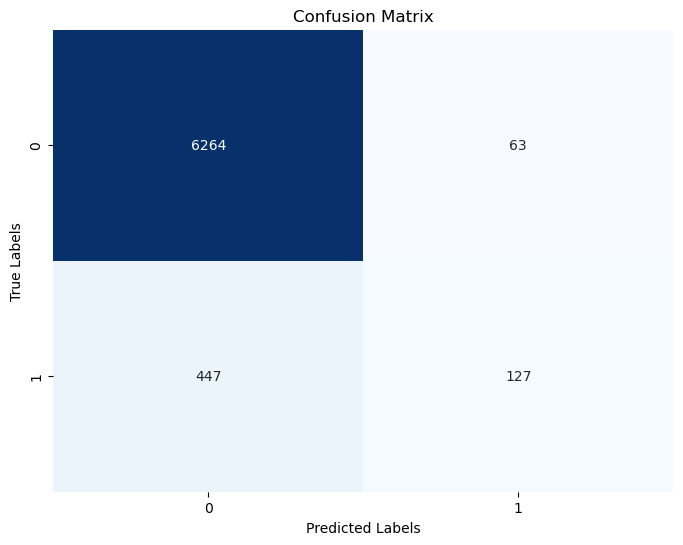

In [32]:
y_pred = (model.predict(x_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##  Kết luận

Sau quá trình phân tích và huấn luyện ta có nhận xét sau:
- Độ chính xác của mô hình rất tốt khi đạt 92% nhưng mức độ sai lầm của mô hình cũng chưa phải là tốt khi tỉ lệ dự đoán sai lên đến 23%.
- Mô hình có số lượng True Negatives cao, cho thấy mô hình hoạt động tốt trong việc nhận biết các khách hàng không có nhu cầu.
- Số lượng False Negatives tương đối cao so với True Positives cho thấy mô hình không đủ nhậy để phát hiện các khách hàng đồng ý gửi tiết kiệm.
- Độ chính xác tổng thể của mô hình có vẻ cao do số lượng True Negatives lớn, nhưng không phản ánh chính xác hiệu quả đối với khách hàng đồng ý gửi tiết kiệm, nguyên nhân có thể là do số lượng khách hàng đồng ý là khá thấp trong tập dữ liệu.
